# 作業 3-2

### Dota2 Games Results 

## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Windows|10|
|程式執行環境|jupyter notebook|1.0.0|
|python 版本|python3|3.7.5|
|安裝環境|pip|20.0.2|

## 安裝

請填寫安裝套件需要的指令

```sh
pip install -r requirements.txt
```

## 計算資源

請填寫執行程式所需要的計算資源，請確保所有資源限制在單一個人桌上型電腦且能夠以總市價低於 5 萬的手段取得。

|計算資源|答案|
|-|-|
|使用 CPU 核心數|1|
|記憶體需求|$\leq 1$GB|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|$\leq 1$GB|

In [66]:
import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time() # 計算執行時間

train_df = pd.read_csv('dota2Train.csv')
test_df = pd.read_csv('dota2Test.csv')

## 資料分析與前處理

- 資料分析内容
- 資料視覺化
- 決定輸入特徵
- 處理缺失值
- 轉換類別
- 其他

### 資料分析內容

此為2016/8/13其中兩小時内Dota2游戲的詳細資料，本次資料分析的目的為通過雙方英雄陣容來預測游戲的勝負。


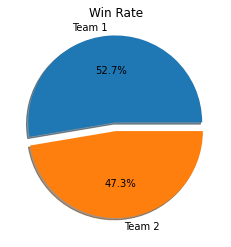

In [2]:
import matplotlib.pyplot as plt

#計算陣營勝率
labels = ('Team 1', 'Team 2')
sizes = (train_df['Result'].value_counts()[1], train_df['Result'].value_counts()[-1])
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title("Win Rate")

plt.show()

In [67]:
#經檢查後發現Hero24及Hero108的資料都是0，故移除。
train_df = train_df.drop(['Hero24', 'Hero108'], axis=1)
test_df = test_df.drop(['Hero24', 'Hero108'], axis=1)

In [4]:
# 計算英雄登場率（不管陣營，1和-1都算）
occurance = {}
for i in train_df.iloc[:, 4:]:
    occurance[i] = len(train_df) - train_df[i].value_counts()[0]

In [5]:
occurance

{'Hero1': 14973,
 'Hero2': 20264,
 'Hero3': 2524,
 'Hero4': 11702,
 'Hero5': 10050,
 'Hero6': 21700,
 'Hero7': 11276,
 'Hero8': 23327,
 'Hero9': 32048,
 'Hero10': 9807,
 'Hero11': 10410,
 'Hero12': 7288,
 'Hero13': 4563,
 'Hero14': 28285,
 'Hero15': 4181,
 'Hero16': 11013,
 'Hero17': 11688,
 'Hero18': 17029,
 'Hero19': 7778,
 'Hero20': 7513,
 'Hero21': 14473,
 'Hero22': 9968,
 'Hero23': 9635,
 'Hero25': 7319,
 'Hero26': 12108,
 'Hero27': 5653,
 'Hero28': 10878,
 'Hero29': 6424,
 'Hero30': 6670,
 'Hero31': 4365,
 'Hero32': 19670,
 'Hero33': 4481,
 'Hero34': 11558,
 'Hero35': 17276,
 'Hero36': 10729,
 'Hero37': 3602,
 'Hero38': 2506,
 'Hero39': 6538,
 'Hero40': 4607,
 'Hero41': 16746,
 'Hero42': 11650,
 'Hero43': 3994,
 'Hero44': 29802,
 'Hero45': 3202,
 'Hero46': 4805,
 'Hero47': 6801,
 'Hero48': 7506,
 'Hero49': 5284,
 'Hero50': 5869,
 'Hero51': 3919,
 'Hero52': 2636,
 'Hero53': 7269,
 'Hero54': 12361,
 'Hero55': 3363,
 'Hero56': 7410,
 'Hero57': 8320,
 'Hero58': 2818,
 'Hero59': 12707

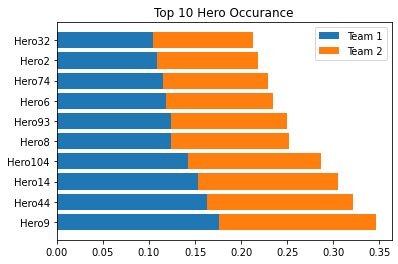

In [6]:
#登場率最高的10個英雄
from collections import Counter
occurance_top = dict(Counter(occurance).most_common(10))

labels = []
values1 = []
values2 = []
for i in occurance_top:
    labels.append(i)
    values1.append(train_df[i].value_counts(normalize=True)[1])
    values2.append(train_df[i].value_counts(normalize=True)[-1])

plt.title('Top 10 Hero Occurance')
p1 = plt.barh(labels, values1)
p2 = plt.barh(labels, values2, left=values1)
plt.legend((p1[0], p2[0]), ('Team 1', 'Team 2'))

In [7]:
#計算勝率（不分陣營）
win_rate = {}
for i in train_df.iloc[:, 4:]:
    win_rate[i] = 0

In [8]:
for i in range(4, 115):
    count = 0
    for j in train_df.iloc[:, i]:
        if j == train_df.iloc[count, 0]:
            win_rate[train_df.columns[i]] += 1
        count += 1
    win_rate[train_df.columns[i]] /= occurance[train_df.columns[i]]

In [9]:
win_rate

{'Hero1': 0.46697388632872505,
 'Hero2': 0.5270430319778918,
 'Hero3': 0.4500792393026941,
 'Hero4': 0.5075200820372586,
 'Hero5': 0.5476616915422886,
 'Hero6': 0.5347465437788018,
 'Hero7': 0.5015963107484924,
 'Hero8': 0.5043940498135208,
 'Hero9': 0.5532014478282576,
 'Hero10': 0.5014785357397777,
 'Hero11': 0.47050912584053795,
 'Hero12': 0.45568057080131724,
 'Hero13': 0.45014245014245013,
 'Hero14': 0.517588828000707,
 'Hero15': 0.46663477636928963,
 'Hero16': 0.49759375283755564,
 'Hero17': 0.48579739904175223,
 'Hero18': 0.5415467731516824,
 'Hero19': 0.44883003342761635,
 'Hero20': 0.5245574337814455,
 'Hero21': 0.43584605817729566,
 'Hero22': 0.5459470304975923,
 'Hero23': 0.4908147379346134,
 'Hero25': 0.43872113676731794,
 'Hero26': 0.47753551370994385,
 'Hero27': 0.5347603042632231,
 'Hero28': 0.5111233682662254,
 'Hero29': 0.5200809464508095,
 'Hero30': 0.5022488755622189,
 'Hero31': 0.534020618556701,
 'Hero32': 0.5455007625826132,
 'Hero33': 0.5239901807632225,
 'Hero34

<BarContainer object of 10 artists>

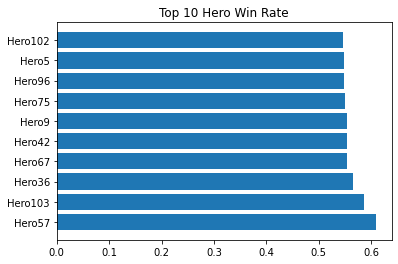

In [10]:
#勝率最高的10個英雄
win_rate_top = dict(Counter(win_rate).most_common(10))

labels = []
values = []

for i in win_rate_top:
    labels.append(i)
    values.append(win_rate_top[i])
    

plt.title('Top 10 Hero Win Rate')
plt.barh(labels, values)

In [11]:
train_x = train_df.iloc[:, 4:]
train_y = train_df['Result']

test_x = test_df.iloc[:, 4:]
test_y = test_df['Result']

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
    
model = LogisticRegression(random_state = 1012)
model.fit(train_x, train_y)
    
train_pred_y = model.predict(train_x)
train_acc = accuracy_score(train_y, train_pred_y)
test_pred_y = model.predict(test_x)
test_acc = accuracy_score(test_y, test_pred_y)

print("Train Accuracy: {}".format(train_acc))
print("Test Accuracy: {}".format(test_acc))

Train Accuracy: 0.600841878035618
Test Accuracy: 0.5974353992617059


## Improvement 1

### 使用NN來進行實作

In [91]:
train_df2 = pd.read_csv('dota2Train.csv')
test_df2 = pd.read_csv('dota2Test.csv')

In [98]:
#經檢查後發現Hero24及Hero108的資料都是0，故移除。
train_df2 = train_df2.drop(['Hero24', 'Hero108'], axis=1)
test_df2 = test_df2.drop(['Hero24', 'Hero108'], axis=1)

In [105]:
count = 0
for i in train_df2['Result']:
    if i == -1:
        train_df2['Result'][count] = 0
    count += 1
    
count = 0
for i in test_df2['Result']:
    if i == -1:
        test_df2['Result'][count] = 0
    count += 1

In [99]:
train_x2 = train_df2.iloc[:, 4:]
train_y2 = train_df2['Result']

test_x2 = test_df2.iloc[:, 4:]
test_y2 = test_df2['Result']

In [107]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=111, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x2, train_y2, epochs=100, batch_size=10)  

_, accuracy = model.evaluate(train_x2, train_y2)
print('Train Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
92650/92650 [==============================] - 14s 150us/step - loss: 0.6701 - accuracy: 0.5844
Epoch 2/100
92650/92650 [==============================] - 14s 153us/step - loss: 0.6633 - accuracy: 0.5978
Epoch 3/100
92650/92650 [==============================] - 13s 146us/step - loss: 0.6619 - accuracy: 0.6000
Epoch 4/100
92650/92650 [==============================] - 13s 141us/step - loss: 0.6608 - accuracy: 0.6036
Epoch 5/100
92650/92650 [==============================] - 13s 144us/step - loss: 0.6600 - accuracy: 0.6034
Epoch 6/100
92650/92650 [==============================] - 13s 142us/step - loss: 0.6591 - accuracy: 0.6051
Epoch 7/100
92650/92650 [==============================] - 14s 155us/step - loss: 0.6585 - accuracy: 0.6063
Epoch 8/100
92650/92650 [==============================] - 15s 164us/step - loss: 0.6578 - accuracy: 0.6061
Epoch 9/100
92650/92650 [==============================] - 14s 153us/step - loss: 0.6572 - accuracy: 0.6080
Epoch 10/100
92650/92650 [==

92650/92650 [==============================] - 13s 142us/step - loss: 0.6476 - accuracy: 0.6195
Epoch 77/100
92650/92650 [==============================] - 14s 148us/step - loss: 0.6474 - accuracy: 0.6194
Epoch 78/100
92650/92650 [==============================] - 13s 146us/step - loss: 0.6474 - accuracy: 0.6202
Epoch 79/100
92650/92650 [==============================] - 13s 137us/step - loss: 0.6475 - accuracy: 0.6201
Epoch 80/100
92650/92650 [==============================] - 15s 162us/step - loss: 0.6474 - accuracy: 0.6195
Epoch 81/100
92650/92650 [==============================] - 13s 145us/step - loss: 0.6474 - accuracy: 0.6182
Epoch 82/100
92650/92650 [==============================] - 14s 154us/step - loss: 0.6472 - accuracy: 0.6191
Epoch 83/100
92650/92650 [==============================] - 15s 159us/step - loss: 0.6472 - accuracy: 0.6188
Epoch 84/100
92650/92650 [==============================] - 14s 156us/step - loss: 0.6472 - accuracy: 0.6199
Epoch 85/100
92650/92650 [======

In [111]:
from sklearn.metrics import accuracy_score

predictions2 = model.predict_classes(test_x2)
accuracy2 = accuracy_score(test_y2, predictions2)
print('Test Accuracy: %.2f' % (accuracy2*100))

Test Accuracy: 58.25


## Improvement 2

加入Domain Knowledge，Dota2的英雄有分5個位置，若陣容平衡（每個位置一個人），勝率就越大。所以我加了Team1 Balance，Team 2 Balance的欄位，分別代表這兩隊的平衡分數，0為最佳（每個位置各一個英雄），4為最糟糕（全部英雄都同一個位置），然後在計算兩者之間的差存入Balance欄位中。所以在Balance欄位中，數字越正代表Team 2贏面大，越負代表Team 1贏面大。

In [54]:
Position1 = ['Hero1', 'Hero6', 'Hero8', 'Hero10', 'Hero12', 'Hero18', 'Hero20', 'Hero35', 'Hero40', 'Hero41', 'Hero42', 'Hero44', 'Hero48', 'Hero54', 'Hero56', 'Hero59', 'Hero63', 'Hero67', 'Hero70', 'Hero72', 'Hero77', 'Hero80', 'Hero81', 'Hero89', 'Hero93', 'Hero94', 'Hero95', 'Hero98', 'Hero109']
Position2 = ['Hero4', 'Hero9', 'Hero11', 'Hero13', 'Hero15', 'Hero17', 'Hero19', 'Hero21', 'Hero22', 'Hero25', 'Hero34', 'Hero36', 'Hero39', 'Hero43', 'Hero45', 'Hero46', 'Hero47', 'Hero49', 'Hero73', 'Hero74', 'Hero76', 'Hero82', 'Hero106', 'Hero113']
Position3 = ['Hero2', 'Hero7', 'Hero29', 'Hero33', 'Hero38', 'Hero53', 'Hero55', 'Hero57', 'Hero61', 'Hero65', 'Hero78', 'Hero85', 'Hero88', 'Hero96', 'Hero97', 'Hero99', 'Hero102', 'Hero104', 'Hero105']
Position4 = ['Hero14', 'Hero23', 'Hero32', 'Hero60', 'Hero62', 'Hero71', 'Hero100', 'Hero107']
Position5 = ['Hero3', 'Hero5', 'Hero16', 'Hero26', 'Hero27', 'Hero28', 'Hero30', 'Hero31', 'Hero37', 'Hero50', 'Hero51', 'Hero52', 'Hero58', 'Hero64', 'Hero66', 'Hero68', 'Hero69', 'Hero75', 'Hero79', 'Hero83', 'Hero84', 'Hero86', 'Hero87', 'Hero90', 'Hero91', 'Hero92', 'Hero101', 'Hero103', 'Hero110', 'Hero110', 'Hero111', 'Hero112']

In [55]:
for i in range(4, 115):
    count = 0
    for j in train_df.iloc[:, i]:
        if train_df.columns[i] in Position1:
            train_df[train_df.columns[i]][count] = j * 1
        elif train_df.columns[i] in Position2:
            train_df[train_df.columns[i]][count] = j * 2
        elif train_df.columns[i] in Position3:
            train_df[train_df.columns[i]][count] = j * 3
        elif train_df.columns[i] in Position4:
            train_df[train_df.columns[i]][count] = j * 4
        elif train_df.columns[i] in Position5:
            train_df[train_df.columns[i]][count] = j * 5
        count += 1

In [56]:
team1_balance = []
team2_balance = []
for i in range(0, len(train_df)):
    point1 = 0
    point2 = 0
    team1_pos = [0, 0, 0, 0, 0]
    team2_pos = [0, 0, 0, 0, 0]
    for j in train_df.iloc[i, 4:]:
        if j > 0:
            team1_pos[j-1] += 1
        elif j < 0:
            team2_pos[abs(j)-1] += 1
    for x in team1_pos:
        if x == 0:
            point1 += 1
    for y in team2_pos:
        if y == 0:
            point2 += 1
    team1_balance.append(point1)
    team2_balance.append(point2)

In [57]:
train_df['Team 1 Balance'] = team1_balance
train_df['Team 2 Balance'] = team2_balance

In [68]:
for i in range(4, 115):
    count = 0
    for j in test_df.iloc[:, i]:
        if test_df.columns[i] in Position1:
            test_df[test_df.columns[i]][count] = j * 1
        elif test_df.columns[i] in Position2:
            test_df[test_df.columns[i]][count] = j * 2
        elif test_df.columns[i] in Position3:
            test_df[test_df.columns[i]][count] = j * 3
        elif test_df.columns[i] in Position4:
            test_df[test_df.columns[i]][count] = j * 4
        elif test_df.columns[i] in Position5:
            test_df[test_df.columns[i]][count] = j * 5
        count += 1

In [69]:
team1_balance = []
team2_balance = []
for i in range(0, len(test_df)):
    point1 = 0
    point2 = 0
    team1_pos = [0, 0, 0, 0, 0]
    team2_pos = [0, 0, 0, 0, 0]
    for j in test_df.iloc[i, 4:]:
        if j > 0:
            team1_pos[j-1] += 1
        elif j < 0:
            team2_pos[abs(j)-1] += 1
    for x in team1_pos:
        if x == 0:
            point1 += 1
    for y in team2_pos:
        if y == 0:
            point2 += 1
    team1_balance.append(point1)
    team2_balance.append(point2)

In [70]:
test_df['Team 1 Balance'] = team1_balance
test_df['Team 2 Balance'] = team2_balance

In [71]:
train_df['Balance'] = train_df['Team 1 Balance'] - train_df['Team 2 Balance']
test_df['Balance'] = test_df['Team 1 Balance'] - test_df['Team 2 Balance']

In [22]:
train_x = train_df.iloc[:, 4:115]
train_x['Balance'] = train_df['Balance']
train_y = train_df['Result']

test_x = test_df.iloc[:, 4:115]
test_x['Balance'] = test_df['Balance']
test_y = test_df['Result']

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
    
model = LogisticRegression(random_state = 1012)
model.fit(train_x, train_y)
    
train_pred_y = model.predict(train_x)
train_acc = accuracy_score(train_y, train_pred_y)
test_pred_y = model.predict(test_x)
test_acc = accuracy_score(test_y, test_pred_y)

print("Train Accuracy: {}".format(train_acc))
print("Test Accuracy: {}".format(test_acc))

Train Accuracy: 0.6019212088505127
Test Accuracy: 0.5999611424130562


## Improvement 3

In [ ]:
使用加入Balance欄位的資料再進行一次

In [112]:
train_x2['Balance'] = train_df['Balance']
test_x2['Balance'] = test_df['Balance']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(96, input_dim=112, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x2, train_y2, epochs=3, batch_size=10)  

_, accuracy = model.evaluate(train_x2, train_y2)
print('Train Accuracy: %.2f' % (accuracy*100))

Epoch 1/3
92650/92650 [==============================] - 18s 198us/step - loss: 0.6694 - accuracy: 0.5881
Epoch 2/3
92650/92650 [==============================] - 15s 167us/step - loss: 0.6628 - accuracy: 0.5999
Epoch 3/3
92650/92650 [==============================] - 2s 21us/step
Train Accuracy: 61.64


In [129]:
from sklearn.metrics import accuracy_score

predictions2 = model.predict_classes(test_x2)
accuracy2 = accuracy_score(test_y2, predictions2)
print('Test Accuracy: %.2f' % (accuracy2*100))

Test Accuracy: 59.48
